<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/trabajos2024/NBA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Muelledes y Luis Jiménez,  Carratalá Lillo, Claudia

# Análisis de los tiros realizados por Stephen Curry y LeBron James durante la temporada 2023


# Descripción de los datos


Este análisis se basa en un dataset disponible en [Kaggle](https://www.kaggle.com/datasets/dhavalrupapara/nba-2023-player-shot-dataset/data)

Este conjunto de datos contiene información detallada sobre los tiros realizados por jugadores de la NBA durante la temporada 2023. Los datos fueron recopilados y organizados para permitir el análisis de los patrones de tiros de los jugadores.

Las columnas son las siguientes:

### Columnas del Dataset

- **Top**: La posición vertical en la cancha donde se realizó el tiro.
- **Left**: La posición horizontal en la cancha donde se realizó el tiro.
- **Date**: La fecha en la que se realizó el tiro. (e.g., Oct 18, 2022).
- **Qtr**: El cuarto en el que se intentó el tiro, típicamente representado como "1st Qtr", "2nd Qtr", etc.
- **Time Remaining**: El tiempo restante en el cuarto cuando se intentó el tiro, típicamente mostrado en minutos y segundos (e.g., 09:26).
- **Result**: Indica si el tiro fue exitoso, con "TRUE" para tiro anotado y "FALSE" para un fallo.
- **Shot Type**: Describe el tipo de tiro intentado, como "2" para un tiro de dos puntos o "3" para un tiro de tres puntos.
- **Distance (ft)**: La distancia en pies desde el aro hasta donde se tomó el tiro.
- **Lead**: Indica si el equipo estaba liderando cuando se intentó el tiro, con "TRUE" para ventaja y "FALSE" para desventaja.
- **LeBron Team Score**: La puntuación del equipo de LeBron James cuando se realizó el tiro.
- **Opponent Team Score**: La puntuación del equipo oponente cuando se realizó el tiro.
- **Opponent**: La abreviatura del equipo oponente (e.g., GSW para Golden State Warriors).
- **Team**: La abreviatura del equipo de LeBron James (e.g., LAL para Los Angeles Lakers).
- **Season**: La temporada en la que se realizaron los tiros, indicada como el año (e.g., 2023).
- **Color**: Representa el código de color asociado al tiro, que puede indicar resultados u otras características (e.g., "red" o "green").


# Preprocesamiento


## Importar librerías y cargar datos

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_stephen_curry = pd.read_csv('/content/gdrive/MyDrive/3_stephen_curry_shot_chart_2023.csv')
df_lebron_james = pd.read_csv('/content/gdrive/MyDrive/1_lebron_james_shot_chart_1_2023.csv')

chunk_size = 500

for gm_chunk in pd.read_csv('/content/gdrive/MyDrive/3_stephen_curry_shot_chart_2023.csv', chunksize=chunk_size):
    print(gm_chunk.shape)


(500, 15)
(500, 15)
(434, 15)


## Preprocesamiento de datos para trabajar


In [ ]:
df_stephen_curry = df_stephen_curry.assign(Player_Name= "Stephen Curry")
df_lebron_james = df_lebron_james.assign(Player_Name= "LeBron James")

# Unificar los datos de los dos jugadores
df = pd.concat([df_stephen_curry, df_lebron_james], ignore_index=True)
df

top  left          date      qtr time_remaining  result  shot_type  \
0      63   300  Oct 18, 2022  1st Qtr           7:27   False          2   
1     133   389  Oct 18, 2022  1st Qtr           7:22    True          2   
2     326   247  Oct 18, 2022  1st Qtr           7:11   False          3   
3     249    89  Oct 18, 2022  1st Qtr           5:16   False          3   
4     282   158  Oct 18, 2022  1st Qtr           3:52   False          3   
...   ...   ...           ...      ...            ...     ...        ...   
2962  118   274  May 22, 2023  4th Qtr          06:49   False          2   
2963  109   221  May 22, 2023  4th Qtr          05:03   False          2   
2964   78   254  May 22, 2023  4th Qtr          03:20    True          2   
2965   78    46  May 22, 2023  4th Qtr          00:26   False          2   
2966   58   192  May 22, 2023  4th Qtr          00:01   False          2   

      distance_ft   lead  lebron_team_score  opponent_team_score opponent  \
0               6   True                  9                    6      LAL   
1              17   True                 11                    6      LAL   
2              27   True                 11                    6      LAL   
3              25   True                 19                   13      LAL   
4              24   True                 22                   17      LAL   
...           ...    ...                ...                  ...      ...   
2962            8  False                 98                  102      DEN   
2963            6  False                100                  102      DEN   
2964            3  False                104                  107      DEN   
2965           20  False                111                  113      DEN   
2966            5  False                111                  113      DEN   

     team  season  color    Player_Name  
0     GSW    2023    red  Stephen Curry  
1     GSW    2023  green  Stephen Curry  
2     GSW    2023    red  Stephen Curry  
3     GSW    2023    red  Stephen Curry  
4     GSW    2023    red  Stephen Curry  
...   ...     ...    ...            ...  
2962  LAL    2023    red   LeBron James  
2963  LAL    2023    red   LeBron James  
2964  LAL    2023  green   LeBron James  
2965  LAL    2023    red   LeBron James  
2966  LAL    2023    red   LeBron James  

[2967 rows x 16 columns]

### Eliminar columnas poco interesantes

Se decidió eliminar las siguientes columnas por los motivos detallados a continuación:
- **season:** todos los datos son de la temporada de 2023, no se comparan datos de otras temporadas, por lo que esta columna no paorta información nueva.
- **opponent:** el equipo contrincante no era una variable de nuestro interés ya que nos vamos a centrar en el juego individual de LeBron James y Stephen Curry.
- **team:** al solo tratar a los jugadores mencionados prevviamente, no era relevante almacenar con qué equipo juegan estos (siempre es el mismo).

In [ ]:
df = df.drop(['season', 'opponent', 'team'], axis=1)
df.head()

top  left          date      qtr time_remaining  result  shot_type  \
0   63   300  Oct 18, 2022  1st Qtr           7:27   False          2   
1  133   389  Oct 18, 2022  1st Qtr           7:22    True          2   
2  326   247  Oct 18, 2022  1st Qtr           7:11   False          3   
3  249    89  Oct 18, 2022  1st Qtr           5:16   False          3   
4  282   158  Oct 18, 2022  1st Qtr           3:52   False          3   

   distance_ft  lead  lebron_team_score  opponent_team_score  color  \
0            6  True                  9                    6    red   
1           17  True                 11                    6  green   
2           27  True                 11                    6    red   
3           25  True                 19                   13    red   
4           24  True                 22                   17    red   

     Player_Name  
0  Stephen Curry  
1  Stephen Curry  
2  Stephen Curry  
3  Stephen Curry  
4  Stephen Curry

### Cambio de tipo de datos

Con tal de facilitar la tarea posterior del entrenamiento y analisis del modelo predictivo, hemos decidido cambiar los tipos por defecto de las columnas a continuación por otros:

- **time_remaining**: El formato original en el que se mostraba el tiempo restante por cuarto era en min:seg, lo que provocaba que el tipo elegido de forma automática fuese object. Por ello, lo transformaremos de minutos y segundos a solo segundos, y cambiaremos su tipo a int.
- **qtr**: El formato original en el que se mostraba el cuarto de tiempo en el que se realizo el disparo era * Qrt. Lo que haremos será dejar solo el número del cuarto y cambiar el tipo de la columna a int.
- **date**: El tipo original que se le había dado de forma automática a esta columna era object, por lo que lo cambiaremos a datetime.

In [ ]:
### Convertimos la variable 'remaining_time', tiempo restante de cuarto, a segundos

for index, row in df.iterrows():
  auxiliarDate = df['time_remaining'][index]
  print(auxiliarDate)
  minut, sec = auxiliarDate.split(":")
  secs = 60 * int(minut) + int(sec)
  df['time_remaining'][index] = secs

7:27
7:22
7:11
5:16
3:52
2:58
6:11
5:15
4:30
4:03
2:48
0:32
5:27
4:51
3:47
3:42
6:23
4:01
3:33
3:15
2:46
9:14
6:55
6:39
4:12
5:59
3:54
2:17
1:44
9:46
9:43
9:21
4:36
2:42
2:17
5:29
4:52
4:04
3:34
2:38
1:52
1:11
0:39
9:06
7:29
7:10
5:47
3:57
7:15
6:47
6:22
3:53
2:50
1:28
0:44
0:13
10:48
9:57
9:16
7:12
3:03
4:42
2:33
1:36
1:10
9:52
5:57
4:09
5:52
2:29
2:25
1:20
11:34
8:57
5:35
8:10
7:34
6:00
5:37
4:07
3:58
3:38
9:30
7:46
6:03
2:14
7:35
5:27
2:46
1:50
11:48
8:29
5:18
4:42
4:20
2:26
1:39
1:11
5:32
3:36
3:15
2:46
2:40
2:04
10:35
8:32
7:54
6:43
5:05
3:25
3:02
5:27
10:33
6:53
5:10
4:48
4:02
3:21
2:14
4:01
3:47
3:15
2:27
0:33
0:00
0:16
10:49
7:26
7:03
5:49
4:44
5:29
4:44
4:11
2:23
0:22
11:18
9:22
6:35
6:03
2:46
8:13
7:40
6:28
4:57
3:32
2:37
1:55


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

0:57
10:01
9:38
4:44
5:03
4:47
2:08
10:54
10:30
7:08
6:22
6:20
5:03
3:43
1:39
10:37
8:39
5:48
5:19
2:10
5:44
4:00
1:31
1:10
7:30
6:28
5:04
4:20
3:04
2:29
1:25
0:31
7:38
3:00
1:55
0:59
11:25
10:04
8:59
5:53
3:50
6:20
5:06
4:11
1:35
0:16
9:27
8:59
6:55
5:57
4:55
4:14
8:36
6:34
5:07
4:33
4:02
1:53
1:24
0:54
11:02
8:14
7:46
6:06
5:11
2:13
7:07
5:26
5:15
11:36
8:13
5:25
5:01
4:00
2:03
1:32
5:05
4:27
3:16
2:26
1:18
0:54
0:35
8:52
8:30
7:12
6:51
4:48
2:59
6:24
3:26
2:15
10:49
3:35
8:46
7:59
6:09
4:34
4:19
3:40
11:26
10:58
5:39
3:40
5:36
4:34
0:56
0:30
10:56
6:37
5:27
10:56
9:47
3:34
3:20
1:22
0:50
0:23
6:06

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin


4:26
3:55
3:36
2:48
2:26
8:45
8:24
6:29
4:51
2:42
2:07
0:17
7:18
6:20
5:53
5:10
4:39
3:37
2:31
1:59
11:44
7:08
6:34
5:47
5:44
3:00
2:03
0:51
11:02
9:09
7:01
5:28
4:50
3:39
0:03
5:34
5:09
2:58
9:37
8:30
5:30
5:24
5:05
1:44
0:29
11:39
10:39
8:49
6:20
5:56
3:20
2:55
1:55
0:24
5:57
4:31
1:55
0:34
11:08
10:16
7:56
6:16
3:23
2:12
1:45
0:14
2:28
0:33
0:14
8:01
7:34
4:57
2:26
1:56
0:36
0:18
6:43
5:47
11:18
10:33
8:40
7:14
5:47
5:26
5:03
2:37
2:07
5:29
4:38
3:43
9:27
7:40
7:21
6:49
5:11
3:02
2:32
2:05
1:42
9:20
7:42
7:20
5:35
3:55
3:05
2:04
1:38
0:43
6:05
2:57
6:49
6:17
5:45
5:05
4:28
11:36
8:33
6:26
5:22
2:42
1:22
0:52
5:48
4:21
3:03
1:57
1:34
0:00
7:12
6:26
5:58
1:41
1:24
5:34
4:49
4:25
2:09
1:37
1:19
7:50
6:48
4:18
1:52
1:14
0:48
9:02
7:45
5:31
2:37
5:32
4:50
3:44
3:07
3:02
0:21
8:13
6:20
5:31
4:32
3:24
2:21
4:41
3:50
2:52
0:07

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin


10:10
7:35
6:02
5:43
3:44
1:40
6:48
6:20
3:45
2:28
2:10
11:14
4:02
3:40
3:12
1:13
0:01
0:50
11:06
5:51
5:13
3:20
3:03
1:44
3:30
1:20
1:06
0:34
10:14
6:17
3:40
2:00
0:30
0:01
4:19
2:48
0:28
11:14
10:49
7:30
3:43
2:46
0:50
7:21
7:18
6:19
3:51
3:24
2:41
5:11
1:43
0:38
0:17
4:58
4:37
4:02
2:57
0:38
0:01
9:56
9:35
8:56
5:51
4:51
4:07
3:13
11:44
7:53
6:59
5:02
4:37
3:15
0:48
4:35
2:40
1:51
1:11
0:49
0:01
6:56
6:06
4:16
3:43
3:13
2:20
10:07
9:23
8:57
7:02
6:38
9:42
8:39
7:16
7:11
6:32
10:32
10:20
8:20
7:45
6:35
5:43
4:22
3:45
3:05
2:12
0:40
0:36
9:08
8:32
7:42
6:39
4:21
5:49
3:51
9:55
7:01
6:43
5:20
4:56
5:34
5:04
2:59
7:20
4:31
1:48
1:30
0:29
10:01
9:30
8:55
8:31
8:06
6:56
6:16
11:12
9:10
8:28

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin


5:53
5:00
1:56
0:59
0:34
0:06
4:20
3:33
1:52
0:35
10:38
10:13
7:08
5:12
4:43
3:47
3:12
2:28
1:11
1:06
5:54
5:07
3:58
2:01
1:31
8:39
7:22
6:55
2:56
2:25
1:37
0:42
4:53
3:04
1:35
10:48
9:57
4:35
3:49
3:09
6:58
6:23
5:32
2:33
2:04
0:28
0:01
2:42
0:55
10:38
5:51
3:34
1:56
5:09
2:18
10:41
9:34
7:33
6:27
3:35
0:02
4:03
2:12
0:41
0:07
11:15
9:01
10:27
7:22
5:26
4:29
1:58
0:19
6:47
6:14
4:51
2:59
2:27
1:56
0:58
4:25
3:53
2:18
9:58
8:53
8:09
7:25
6:29
2:25
1:18
0:03
5:26
1:39
10:53
8:17
6:55
6:27
4:44
4:23
0:38
6:47
3:33
1:17
0:51
11:10
10:45
7:31
6:02
3:16
1:16
0:07
1:47
8:54
7:30
6:04
5:12
3:20
1:51
0:40
0:31
0:05
6:23
3:54
2:35
9:43
3:30
3:02
1:14
0:39
2:34


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

1:05
0:14
8:02
7:32
10:46
8:23
6:07
5:40
5:22
3:03
1:39
0:06
3:50
0:32
0:03
10:35
9:19
6:19
4:53
3:43
2:07
1:38
0:20
9:57
8:46
4:21
3:25
11:07
9:50
9:25
6:53
4:51
10:58
5:57
4:09
3:18
3:11
2:57
2:01
10:31
7:31
4:06
3:37
10:00
9:18
6:03
7:26
6:57
5:35
3:31
11:24
8:20
7:49
6:10
11:50
11:39
10:07
8:16
7:54
2:23
1:14
0:26
0:06
5:15
11:19
10:33
9:58
2:14
1:19
10:22
8:56
8:29
6:52
6:26
4:41
3:34
0:20
11:35
11:15
9:17
8:13
3:14
2:29
2:24
2:03
0:47
8:51
8:48
5:12
4:09
11:10
10:33
9:52
8:34
8:05
7:02
6:22
4:48
1:23
10:58
8:55
6:56
7:58
7:09
4:15
8:37
7:54
4:25
4:05
6:45
4:51
4:31
3:57
2:23
1:54
10:38
8:54
7:28
5:55
5:13
3:27
8:43
6:03


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

2:55
1:51
1:08
0:45
0:19
3:55
2:04
1:10
1:00
10:13
9:20
7:46
2:54
2:25
5:42
5:23
11:23
5:42
2:51
0:45
3:48
2:53
11:13
10:53
10:27
7:37
6:43
4:45
1:39
0:27
5:34
3:26
0:59
0:31
11:26
10:22
8:34
4:51
4:28
4:03
3:35
3:07
2:36
1:36
0:01
8:27
6:32
6:10
3:41
2:18
9:21
8:46
7:01
5:36
4:32
10:42
9:55
8:43
7:27
7:09
5:02
0:36
0:06
10:03
9:34
8:41
6:21
6:00
4:11
7:58
6:42
4:12
2:59
2:33
2:12
1:01
0:21
9:30
5:19
11:47
10:12
8:02
8:53
7:33
6:33
6:16
5:45
9:41
9:16
7:38
7:02
8:02
6:32
4:51
8:53
8:20
7:32
6:24
4:33
3:39
2:02
0:47
0:05
10:59
8:31
7:49
6:34
11:45
10:48
10:08
4:00
2:56
2:18
0:32
3:33
8:36
7:59
3:55
3:33
0:55
0:33
9:41
9:38
7:28
6:39
5:31
5:09
9:59
9:27
8:46
5:01
0:08
11:18
10:31
6:45
5:43
3:56
10:37
0:47
11:32
10:57


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

10:51
10:30
8:00
4:11
3:44
9:56
3:22
2:20
0:47
10:17
9:47
8:38
8:04
7:34
5:26
4:52
4:28
2:15
1:20
0:40
0:03
10:28
5:35
4:25
3:52
3:21
2:31
10:06
4:26
3:23
2:27
0:00
11:05
5:53
4:46
4:06
2:27
2:01
10:44
9:00
8:15
2:16
0:29
11:42
7:40
5:28
1:44
1:37
0:53
0:24
0:12
11:35
4:07
3:23
2:45
2:09
1:08
8:59
6:34
5:31
4:34
10:38
7:53
7:22
7:02
5:17
5:10
10:50
10:26
4:41
11:35
10:12
9:02
8:33
8:00
7:30
2:50
2:08
10:29
8:38
5:53
3:43
11:31
10:10
8:29
7:31
7:09
6:44
5:16
5:06
2:44
1:41
9:53
8:40
7:40
2:19
1:31
0:40
11:23
11:15
10:31
9:53
9:22
2:34
2:30
0:25
10:32
8:03
7:40
7:36
5:47
4:52
2:28
1:51
1:15
7:23
6:20
5:06
2:47
1:50
1:28
0:25
8:45
8:16
6:44
5:34
3:22
2:48
1:03
0:00
6:18
8:52
8:31
7:20
2:57
0:56
9:01
8:36
7:55
7:20
5:50
4:14
9:21


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

7:53
5:37
9:41
6:33
5:46
5:29
3:34
7:02
6:19
3:27
3:02
1:28
1:03
0:32
10:48
10:00
6:27
10:54
7:19
7:59
5:49
4:15
3:48
1:48
0:50
0:32
0:00
11:19
3:07
7:24
6:50
4:03
3:17
2:21
1:19
0:47
0:00
11:09
5:26
4:08
3:49
2:35
2:28
5:29
2:42
1:11
0:27
3:28
10:57
10:32
9:55
8:05
6:32
5:32
4:52
2:29
1:12
0:43
10:34
8:39
6:33
11:48
11:00
9:20
7:08
4:33
1:47
0:54
0:06
0:02
9:48
7:01
2:41
1:37
1:13
0:01
10:51
10:27
9:33
8:19
7:09
5:26
3:28
8:45
5:22
3:48
3:34
0:51
9:52
0:22
0:01
10:49
9:39
7:07
5:46
4:27
11:26
8:49
8:35
7:25
6:39
5:52
4:10
0:57
0:14
3:23
3:04
0:06
10:54
9:48
8:53
8:34
6:32
0:31
0:00
10:45
8:53
8:18
6:22
4:06
4:01
3:15
11:02
9:08
6:34
6:07
5:21
2:10
1:45
0:22
9:08
8:43
1:32
11:26
6:37
5:48
2:47
0:04
0:01
10:51
8:32
6:57
2:16
11:12
10:31
9:28


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

8:59
7:51
5:48
4:41
3:57
10:55
9:06
3:49
2:21
1:55
0:56
10:48
9:15
9:07
5:41
5:12
4:43
3:52
2:34
1:00
11:22
10:53
8:35
8:03
7:58
7:50
7:17
4:27
4:00
2:53
2:18
1:46
11:33
10:47
9:59
9:10
8:07
7:46
6:50
6:40
5:56
3:34
2:57
9:55
9:29
2:52
1:58
1:37
0:56
0:34
11:38
8:29
2:54
2:30
8:11
7:01
4:57
9:38
9:04
7:52
6:48
5:44
4:50
4:32
3:35
1:38
1:08
9:05
1:13
0:20
11:51
8:38
7:15
3:47
3:21
1:07
0:35
9:43
8:53
10:35
9:53
7:21
5:48
5:19
4:45
10:53
9:54
8:23
7:07
5:37
1:32
8:38
7:57
7:04
6:22
5:11
4:19
3:35
2:56
11:12
10:20
7:25
11:39
11:06
9:10
7:30
6:22
3:49
2:54
1:34
1:08
11:06
10:57
9:12
7:07
1:41


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

1:23
0:48
0:01
10:08
9:14
8:42
8:15
7:28
6:20
4:48
4:00
1:05
0:26
0:17
7:30
5:53
10:52
10:20
9:57
8:38
8:17
5:20
1:37
0:01
11:43
10:15
6:39
6:32
4:48
4:25
2:53
2:31
10:41
10:02
5:09
4:42
3:59
3:19
8:16
7:57
5:08
3:11
2:49
1:23
0:42
0:01
7:07
2:04
11:46
9:37
8:39
7:53
7:23
6:44
5:01
3:59
2:59
1:35
0:23
9:58
9:49
8:34
8:28
6:23
6:11
4:29
09:26
08:38
08:10
05:24
01:02
11:30
10:30
10:05
09:30
08:55
07:06
03:53
02:34
01:48
00:58
10:49
09:00
08:44
01:11
00:06
11:44
10:27
09:49
09:04
03:46
10:30
10:06
08:52
06:07
00:25
10:58
09:48
09:27
02:03
07:52
07:04
02:07
00:59
11:17
10:53
09:32
00:02
09:52
09:52
00:27
11:03
08:18
07:51
03:21
00:55
00:45
09:16
09:03
00:59
00:30
00:00
07:33
05:29
04:42
03:55
01:56
00:52
00:07
00:00
00:01
11:47
10:32
09:50
09:19
08:38
06:35
06:21
09:58
07:34
00:26
11:44
11:17
10:51


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

09:26
08:56
08:13
08:09
07:01
06:32
02:58
11:22
09:57
08:56
06:19
04:53
03:57
08:45
06:51
05:42
01:55
00:35
00:06
10:44
09:33
07:22
05:55
05:34
05:32
10:18
09:54
09:45
08:58
08:04
07:09
11:21
09:13
08:09
05:13
00:06
10:12
09:42
09:38
07:12
01:39
01:33
00:49
11:25
11:01
10:00
09:11
08:32
08:24
06:45
08:22
06:33
02:20
10:04
08:01
00:58
11:30
09:21
03:19
01:57
11:07
10:03
08:27
02:23
01:09
00:40
11:03
07:24
03:02
01:29
00:11
04:44
03:23
01:56
01:16
00:14
08:02
05:47
00:20
10:32
10:28
09:23
07:12
02:48
02:44
00:23
09:49
08:35
07:49
06:01
08:52
07:53
06:38
06:13
02:11
10:19
09:52
06:04
05:45
11:28
10:11
09:48
09:27
09:22
05:32
01:33
00:23
11:25
07:07
06:24
05:58
05:05
04:45
03:52
02:06
08:08
06:12
05:38
10:46
09:21
05:42
10:04
09:16
08:20
06:37
02:07
01:33
11:18
10:27
09:58

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin


07:22
07:18
00:28
10:47
10:13
08:55
08:14
07:47
06:43
06:12
11:43
10:42
11:30
11:02
10:27
08:58
02:11
00:38
09:10
04:48
08:05
07:49
06:21
04:28
04:03
03:28
01:50
09:34
08:43
07:51
05:13
11:53
09:51
07:05
06:39
01:46
00:55
00:01
11:04
08:25
07:53
06:40
03:06
09:59
08:56
08:33
03:09
01:25
11:38
10:36
09:51
07:31
07:00
09:27
07:52
06:47
04:19
03:33
00:53
11:25
11:03
09:48
09:37
08:42
07:45
06:35
05:12
04:30
02:16
00:20
10:06
10:44
09:22
09:06
05:47
00:55
00:35
00:29
07:57
06:42
06:41
06:01
10:07
09:17
08:24
06:27
05:20
02:58
10:41
05:47
11:34
10:26
09:43
09:15
08:36
06:58
04:46
01:06
10:50
10:01
07:13
04:32
11:23
10:32
10:07
09:28
09:03
07:33
07:20
05:52
05:19
03:57
03:22
02:41
01:23
10:18
08:12
06:41
06:12
05:49
05:07
04:53
10:50
08:50


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

01:44
00:53
11:14
10:23
09:44
08:01
11:22
10:48
10:41
09:07
08:39
03:32
03:00
02:57
02:48
01:33
01:01
11:17
09:09
07:33
07:00
00:06
09:43
09:37
07:24
06:30
05:30
09:18
08:46
06:43
01:27
00:22
00:00
07:11
10:07
07:08
05:48
02:56
02:34
02:14
01:17
00:50
00:44
07:33
07:08
01:32
11:42
09:23
09:03
05:42
04:40
07:21
01:56
01:07
04:46
02:22
11:36
09:35
08:28
06:50
06:13
11:20
09:54
09:10
08:29
07:47
06:14
04:47
08:59
04:55
04:16
10:06
08:54
06:32
05:57
05:36
04:04
02:59
02:07
01:12
09:48
05:02
11:42
09:15
07:07
06:54
05:02
00:01
10:32
09:30
07:43
00:51
00:34
11:09
10:35
08:55
08:20
06:04
05:22
03:52
02:12
00:59
00:00
02:48
00:48
10:39
05:57
05:53
04:00
11:29
08:59
07:52
07:07
01:05
00:43
00:27
11:01
07:04
07:00
00:41
05:10
04:34
03:51
03:35
02:59
10:54
10:09
07:54
06:37
06:10
11:36
10:15
08:53
07:05
04:04
01:00
11:42
07:07
05:01
10:48
10:27
08:23
07:26
05:21
05:09
03:58
03:35
00:42
00:27
11:11
10:38
08:53
06:38
06:16
11:26
10:34
09:59
09:11
07:20
03:02
01:55
01:38
11:28
09:35
06:14
09:15
07:0

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin


06:16
03:32
10:33
09:29
06:58
09:19
08:19
07:57
03:53
03:40
10:21
09:52
07:14
05:00
04:31
11:33
10:15
09:27
07:02
01:26
10:24
09:32
09:11
08:08
07:37
07:05
06:21
05:56
03:27
02:59
06:23
06:10
05:13
03:19
11:23
10:20
09:28
07:33
06:58
08:43
07:53
02:11
00:56
08:52
07:24
06:34
09:56
08:44
07:45
07:29
05:26
04:57
10:51
10:12
09:41
08:59
04:50
11:39
10:55
08:08
06:05
04:42
03:34
00:48
00:22
10:02
07:51
07:21
04:26
03:14
03:11
02:23
10:37
07:29
06:42
05:46
03:43
02:18
01:43
08:47
07:46
07:19
05:33
04:52
09:34
09:07
08:31
08:17
08:01
06:33
04:31
01:45
00:32
11:46
10:35
09:55
08:38
08:08
07:36
03:41
09:17
07:48
06:49
03:03
02:01
09:55
08:38
06:10
04:07
00:12
09:14
09:00
03:21
02:20
11:30
09:42
08:30
06:55
04:31
11:17
08:52
08:19
07:29
06:26
10:12
06:46
06:15
05:40
11:07
10:11
09:32
09:10
08:31
07:26
06:32
05:44
02:52
01:57
11:00
10:31
10:07
07:13
04:51
04:26
00:01
10:20
09:20
07:06
03:58
03:35
02:12
00:48
11:37
10:01
09:34


<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

09:31
04:54
09:36
08:24
07:50
07:09
02:31
09:49
06:59
06:05
05:04
02:31
01:52
01:48
06:43
05:30
04:49
03:27
00:42
00:38
00:00
03:45
01:37
00:20
00:07
11:42
10:18
08:48
08:28
07:57
06:55
05:43
01:31
00:59
07:24
01:02
00:43
09:15
08:11
05:51
00:38
11:18
10:01
09:36
09:07
08:40
03:19
02:20
10:18
09:03
08:41
06:51
10:46
10:30
10:25
08:32
07:03
00:59
00:36
11:22
09:24
08:55
08:24
06:10
03:50
10:18
09:48
09:43
07:52
06:07
04:47
02:58
01:36
00:50
11:45
11:02
07:31
07:10
05:38
11:28
10:29
09:56
05:37
04:46
01:00
10:47
09:54
06:30
06:12
05:30
03:59
03:28
08:34
07:30
06:09
03:36
01:49
01:10
00:36
11:18
09:31
07:58
05:39
05:18
00:00
10:57
10:16
09:47
09:34
06:42
01:53
00:45
09:30
07:24
06:31
00:45
06:01
03:07
00:57
00:27
11:47
10:27
09:58
07:37
07:15
06:35
05:35
00:40
11:22
08:24
08:07
07:21
00:01
11:31
10:41
10:10
08:26
07:16
06:41
04:40
03:18
02:52
01:21
03:06
11:27
09:00
06:46
06:18
11:44
10:02
07:31
01:26
00:43
00:13
11:53
11:49
09:30
09:25
08:06
07:27
06:04
04:28
04:09
04:05
11:17
10:55
09:5

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

00:00
04:43
04:16
03:14
02:47
00:37
10:48
08:42
07:13
06:39
04:56
10:52
09:39
08:03
02:16
00:47
11:44
06:56
06:28
05:56
04:30
01:26
00:41
09:04
05:29
01:41
01:12
00:39
04:45
01:56
00:19
11:31
10:21
09:11
05:58
11:46
09:47
08:33
05:47
05:15
04:22
10:11
08:34
07:06
05:53
08:27
06:08
02:35
01:28
01:20
11:13
10:09
04:18
11:24
10:59
09:13
07:24
02:58
01:37
08:28
08:09
07:41
06:51
03:29
02:51
11:47
09:47
07:14
05:48
04:53
00:52
00:12
11:43
09:58
07:03
06:11
05:40
04:50
11:39
10:53
10:19
07:52
11:26
08:29
07:56
05:11
04:33
02:00
01:06
00:10
07:26
01:51
11:19
10:30
09:41
03:27
10:46
10:20
08:53
00:42
11:11
10:52
10:36
08:59
08:08
07:36
11:44
00:07
11:15
11:01
08:02
06:59
00:25
00:19
00:05
11:30
11:19
11:17
11:16
11:10
07:28
07:26
07:14
01:15
11:03
10:01
07:48
07:20
06:51
02:27
00:46
00:04
10:20
10:16
08:49
07:25
02:39
08:48
06:37
03:16
11:44
10:52
09:34
09:26
06:09
05:44
05:03
04:28
01:26
02:54
02:19
04:40
02:10
00:37
09:28
04:26
09:01
04:02
02:44
01:05
10:51
08:18
08:08
06:38
06:37
10:19
05:3

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

04:06
10:19
09:40
07:08
06:46
05:27
11:20
10:28
08:45
01:44
01:26
01:18
10:32
10:09
07:36
07:14
00:59
00:00
10:57
00:48
10:52
09:04
03:16
02:05
00:54
10:38
10:01
07:00
02:10
11:23
10:05
10:02
07:34
06:59
11:51
11:07
08:07
01:15
00:47
00:30
11:17
09:02
08:22
11:22
08:42
02:45
11:40
11:21
10:42
10:27
09:16
08:24
07:57
09:41
08:39
07:36
02:29
00:24
10:02
09:10
08:35
04:03
03:26
02:53
00:00
04:36
03:03
02:36
00:58
00:27
07:47
11:34
09:58
08:14
01:56
00:26
11:09
10:35
08:59
08:27
07:33
06:29
05:13
01:37
00:34
09:54
07:46
04:14
02:54
01:34
10:09
07:34
06:32
11:06
08:36
07:28
00:46
11:14
07:44
07:16
06:30
11:08
10:02
09:16
09:04
07:34
05:36
02:19
01:17
10:11
09:48
09:44
09:11
08:49
07:37
11:28
10:27
08:39
07:06
02:10
00:05
11:43
09:26
08:00
06:57
04:28
03:52
08:35
06:05
03:32
02:55
01:59
01:07
00:39
11:28
10:39
10:15
08:50
05:21
11:32
10:26
09:42
07:50
03:36
02:21
01:54
10:58
09:08
07:23
00:22
04:29
02:36
02:02
01:21
02:42
08:13
06:59
06:26
06:00
11:42
10:42
09:53
06:50
06:01
02:09
10:12
09:5

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

06:10
05:40
00:00
08:49
08:07
05:05
03:48
03:10
01:19
01:11
11:40
10:54
10:36
09:54
09:07
05:50
09:05
07:35
04:41
01:18
11:26
10:30
08:46
07:18
05:57
11:35
09:12
06:49
04:01
03:21
00:34
00:01
11:46
08:24
07:37
05:55
01:05
07:43
00:47
11:19
10:17
10:16
09:26
08:42
00:00
03:50
01:38
00:29
11:23
09:47
01:26
00:48
00:09
10:05
08:09
03:19
00:09
06:49
05:51
05:11
11:32
11:06
06:38
05:23
04:52
08:27
06:11
05:53
05:24
11:42
08:03
05:50
00:52
00:12
06:10
02:19
02:12
00:27
10:46
10:04
09:39
09:08
08:44
06:14
05:39
01:14
00:02
11:42
10:04
07:18
06:28
05:23
11:24
10:47
08:50
08:10
05:58
04:57
04:20
04:20
03:03
00:20
11:14
10:16
06:58
06:33
02:11
01:29
01:07
00:02
10:08
08:28
07:47
01:37
00:23
11:32
10:14
08:53
05:47
00:48
08:02
05:22
05:00
04:43
03:58
10:16
08:50
05:55
04:31
02:21
01:01
09:13
07:41
06:15
01:53
00:56
00:00
10:03
09:25
06:56
06:12
00:00
09:47
09:25
08:18
08:05
05:54
05:51
05:02
02:55
01:57
01:05
00:08
11:05
03:11
00:47
10:57
07:08
06:44
11:05
09:48
09:16
06:48
06:09
03:42
00:53
11:0

<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining'][index] = secs
<ipython-input-10-a6fd0551cabd>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

In [ ]:
### Convertimos la variable 'qtr' en formato 'int' para que se tome como variable numérica

for index, row in df.iterrows():
  auxiliarDate = df['qtr'][index]
  if auxiliarDate == "1st Qtr":
    df['qtr'][index] = 1
  elif auxiliarDate == "2nd Qtr":
    df['qtr'][index] = 2
  elif auxiliarDate == "3rd Qtr":
    df['qtr'][index] = 3
  elif auxiliarDate == "4th Qtr":
    df['qtr'][index] = 4
  else:
    df['qtr'][index] = 0


df[['qtr']] = df[['qtr']].astype(int)
df[['time_remaining']] = df[['time_remaining']].astype(int)

Se han truncado las últimas 5000 líneas del flujo de salida.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['qtr'][index] = 2
<ipython-input-11-87e882f7ff4e>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment

top  left          date  qtr  time_remaining  result  shot_type  \
0   63   300  Oct 18, 2022    1             447   False          2   
1  133   389  Oct 18, 2022    1             442    True          2   
2  326   247  Oct 18, 2022    1             431   False          3   
3  249    89  Oct 18, 2022    1             316   False          3   
4  282   158  Oct 18, 2022    1             232   False          3   

   distance_ft  lead  lebron_team_score  opponent_team_score  color  \
0            6  True                  9                    6    red   
1           17  True                 11                    6  green   
2           27  True                 11                    6    red   
3           25  True                 19                   13    red   
4           24  True                 22                   17    red   

     Player_Name  
0  Stephen Curry  
1  Stephen Curry  
2  Stephen Curry  
3  Stephen Curry  
4  Stephen Curry

In [ ]:
### Convertimos la variable 'date' en formate 'DateTime'

df['date'] = pd.to_datetime(df['date'], format="%b %d, %Y")
df.head()

top  left       date  qtr  time_remaining  result  shot_type  distance_ft  \
0   63   300 2022-10-18    1             447   False          2            6   
1  133   389 2022-10-18    1             442    True          2           17   
2  326   247 2022-10-18    1             431   False          3           27   
3  249    89 2022-10-18    1             316   False          3           25   
4  282   158 2022-10-18    1             232   False          3           24   

   lead  lebron_team_score  opponent_team_score  color    Player_Name  
0  True                  9                    6    red  Stephen Curry  
1  True                 11                    6  green  Stephen Curry  
2  True                 11                    6    red  Stephen Curry  
3  True                 19                   13    red  Stephen Curry  
4  True                 22                   17    red  Stephen Curry

### Añadir nuevas columnas

A partir de las columnas iniciales, hemos decidido crear dos columnas más que representen información que consideramos que puede ser prometedora para el análisis de datos y el modelo de entrenamiento. Dichas columnas son:

**time_remaining_total**: Esta columna representará el tiempo que queda para que se pite el fin del partido. La magnitud escogida será en segundos, para que sea consistente con los cambios anteriores.
**dif_points**: Esta columna representará la diferencia de puntos que hay entre el equipo del jugador que estamos analizando y el equipo rival. El resultado será positivo si van ganando, y negativo si van perdiendo.

In [ ]:
### Calculamos el tiempo restante del total del partido y creamos nueva variable 'time_remaining_total'
df = df.assign(time_remaining_total= 0)

for index, row in df.iterrows():
  auxiliarDate = df['time_remaining'][index]
  df['time_remaining_total'][index] = auxiliarDate + ((4 - df['qtr'][index]) * 720)

Se han truncado las últimas 5000 líneas del flujo de salida.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['time_remaining_total'][index] = auxiliarDate + ((4 - df['qtr'][index]) * 720)
<ipython-input-13-b1b35d0adf12>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_

top  left       date  qtr  time_remaining  result  shot_type  distance_ft  \
0   63   300 2022-10-18    1             447   False          2            6   
1  133   389 2022-10-18    1             442    True          2           17   
2  326   247 2022-10-18    1             431   False          3           27   
3  249    89 2022-10-18    1             316   False          3           25   
4  282   158 2022-10-18    1             232   False          3           24   

   lead  lebron_team_score  opponent_team_score  color    Player_Name  \
0  True                  9                    6    red  Stephen Curry   
1  True                 11                    6  green  Stephen Curry   
2  True                 11                    6    red  Stephen Curry   
3  True                 19                   13    red  Stephen Curry   
4  True                 22                   17    red  Stephen Curry   

   time_remaining_total  
0                  2607  
1                  2602  
2                  2591  
3                  2476  
4                  2392

In [ ]:
### Creamos nueva variable con la diferencia de puntos entre equipos

df['dif_points'] = df['lebron_team_score'] - df['opponent_team_score']
df.head()

top  left       date  qtr  time_remaining  result  shot_type  distance_ft  \
0   63   300 2022-10-18    1             447   False          2            6   
1  133   389 2022-10-18    1             442    True          2           17   
2  326   247 2022-10-18    1             431   False          3           27   
3  249    89 2022-10-18    1             316   False          3           25   
4  282   158 2022-10-18    1             232   False          3           24   

   lead  lebron_team_score  opponent_team_score  color    Player_Name  \
0  True                  9                    6    red  Stephen Curry   
1  True                 11                    6  green  Stephen Curry   
2  True                 11                    6    red  Stephen Curry   
3  True                 19                   13    red  Stephen Curry   
4  True                 22                   17    red  Stephen Curry   

   time_remaining_total  dif_points  
0                  2607           3  
1                  2602           5  
2                  2591           5  
3                  2476           6  
4                  2392           5

## Resumen del dataset preprocesado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2967 entries, 0 to 2966
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top                   2967 non-null   int64 
 1   left                  2967 non-null   int64 
 2   date                  2967 non-null   object
 3   qtr                   2967 non-null   int64 
 4   time_remaining        2967 non-null   int64 
 5   result                2967 non-null   bool  
 6   shot_type             2967 non-null   int64 
 7   distance_ft           2967 non-null   int64 
 8   lead                  2967 non-null   bool  
 9   lebron_team_score     2967 non-null   int64 
 10  opponent_team_score   2967 non-null   int64 
 11  color                 2967 non-null   object
 12  Player_Name           2967 non-null   object
 13  time_remaining_total  2967 non-null   int64 
 14  dif_points            2967 non-null   int64 
dtypes: bool(2), int64(10), object(3)
memory usa

### Guardar fichero con datos unificados y preprocesados

In [ ]:
df.to_csv('player_shots_final.csv')
!cp player_shots_final.csv "gdrive/MyDrive/"

# Análisis de los datos


In [ ]:
### Definimos el test chi-cuadrado para usar luego
import scipy.stats as stats

def chi(array):
  chi2, p, dof, expected = stats.chi2_contingency(array)
  print(f'Chi cuadrado = {chi2} \n p-valor = {p}')
  if p <= 0.05:
    N = np.sum(array)
    min_dim = min(array.shape)-1
    result = np.sqrt((chi2/N)/ min_dim)
    print(f'\n V Cramer = {result}')

## Descriptivos básicos

In [ ]:
import seaborn as sns

# Descriptivos de las variables numéricas
df.describe()

top         left                           date          qtr  \
count  2967.000000  2967.000000                           2967  2967.000000   
mean    170.954499   238.989552  2023-01-31 03:39:22.386248960     2.533873   
min      26.000000    -3.000000            2022-10-18 00:00:00     0.000000   
25%      72.000000   187.000000            2022-12-02 00:00:00     2.000000   
50%     147.000000   240.000000            2023-01-24 00:00:00     3.000000   
75%     273.000000   291.000000            2023-04-04 00:00:00     4.000000   
max     389.000000   483.000000            2023-05-22 00:00:00     4.000000   
std     101.972579   106.550721                            NaN     1.139665   

       time_remaining    shot_type  distance_ft  lebron_team_score  \
count     2967.000000  2967.000000  2967.000000        2967.000000   
mean       358.880013     2.429727    15.595214          61.600270   
min          0.000000     2.000000     0.000000           0.000000   
25%        177.500000     2.000000     4.000000          33.000000   
50%        370.000000     2.000000    18.000000          62.000000   
75%        536.000000     3.000000    26.000000          90.000000   
max        713.000000     3.000000    36.000000         140.000000   
std        207.529999     0.495121    10.884684          35.087473   

       opponent_team_score  time_remaining_total   dif_points  
count          2967.000000           2967.000000  2967.000000  
mean             60.619818           1414.491743     0.980452  
min               0.000000              0.000000   -27.000000  
25%              32.000000            663.000000    -5.000000  
50%              61.000000           1381.000000     1.000000  
75%              90.000000           2102.000000     7.000000  
max             135.000000           3166.000000    36.000000  
std              35.257224            851.538417     9.347507

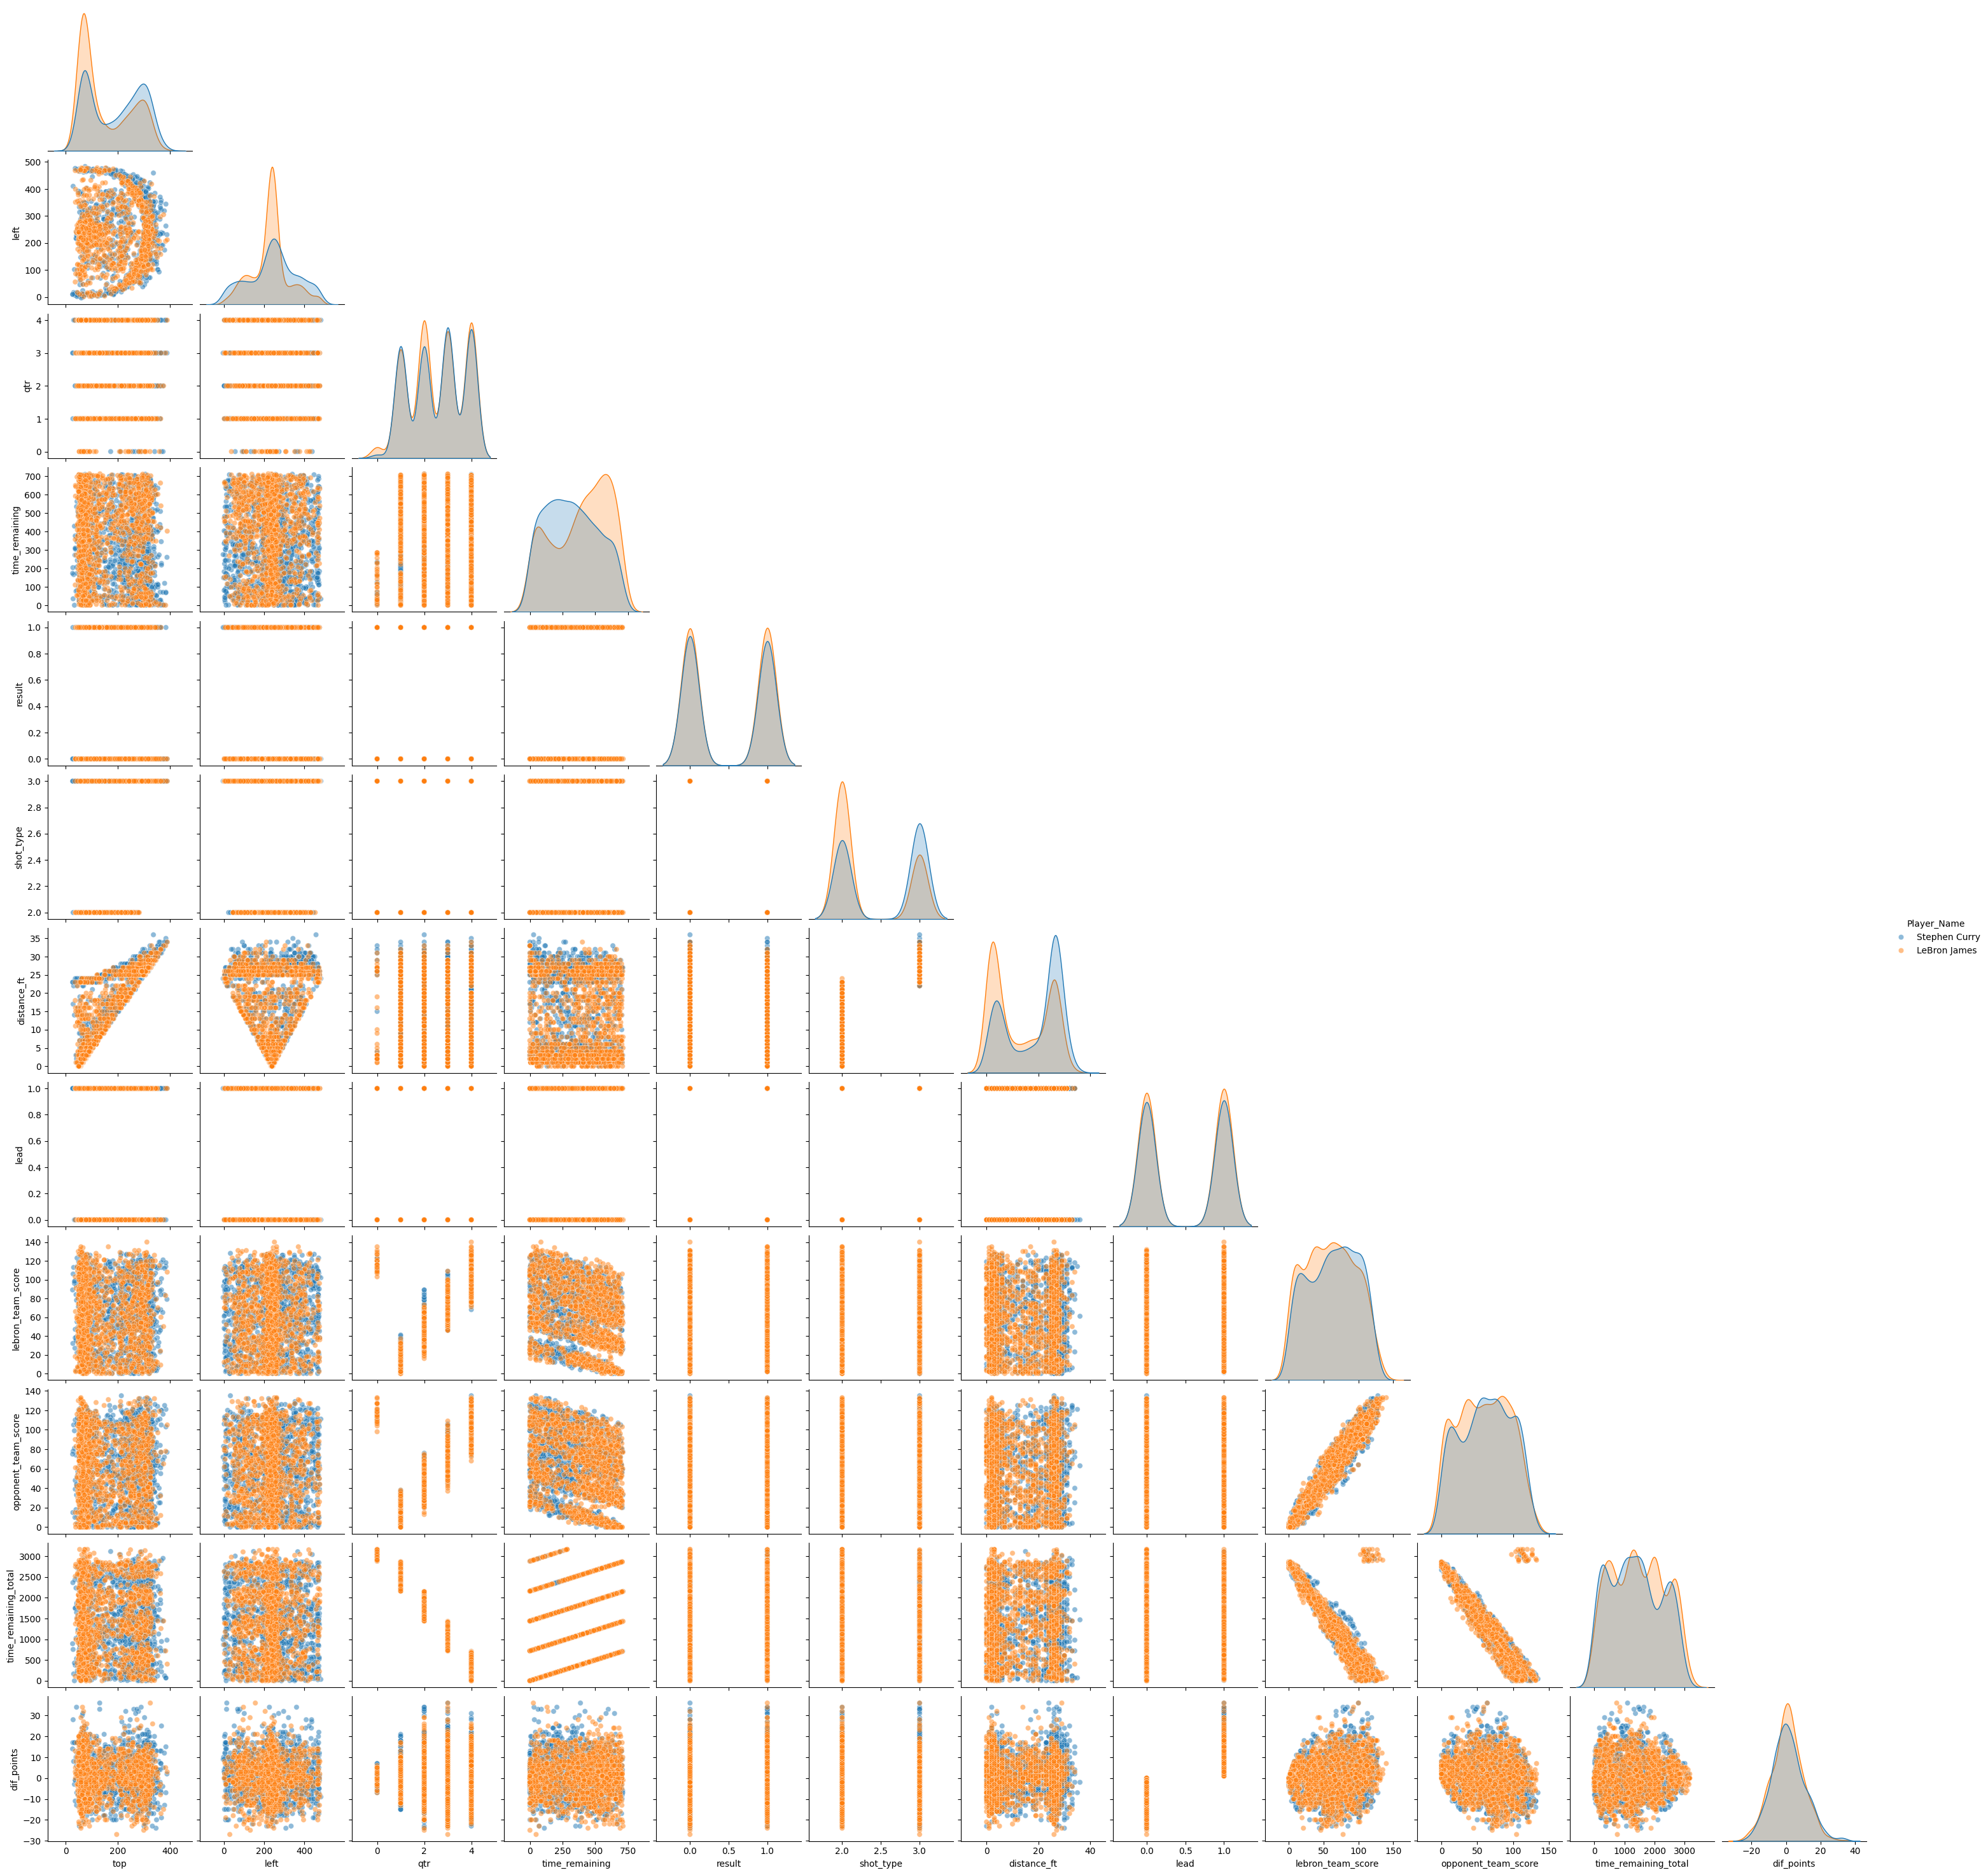

In [ ]:
### Relación entre pares de variables agrupadas por jugador (azul:Curry / naranja:Lebron)
sns.pairplot(df, hue='Player_Name', plot_kws={'alpha':0.5}, corner=True)

## Heatmap variables numéricas

<Axes: >

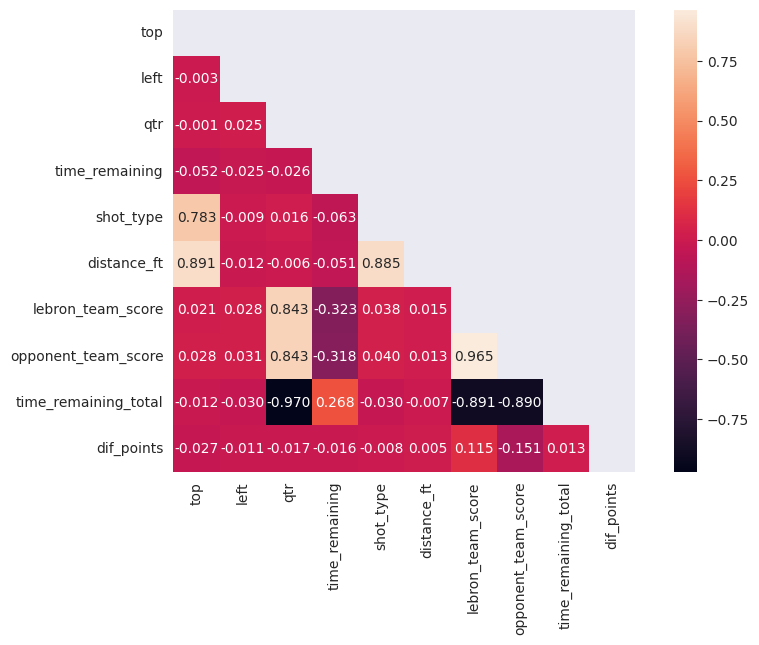

In [ ]:
# heatmap var numericas (habria que hacer LaberEncoder antes de hacer esto pq no estan en la misma escala)
var_numeric = df.select_dtypes('int64')
corr = var_numeric.corr()
matrix = np.triu(corr)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, mask=matrix, fmt='.3f', square=True)

Se observa en el heatmap que no hay correlaciones relevantes entre las distintas variables numéricas.

Las únicas variables que muestran correlación elevada se deben a relaciones lógicas que no afectan a la precisión del disparo.

Como por ejemplo, la relación entre `time_remaining_total` y el `qtr`. Obviamente conforme mayor sea el cuarto menor es el tiempo restante del partido.

## Posición en la pista
![image.png](https://d3pnpe87i1fkwu.cloudfront.net/wp-content/uploads/2022/05/NBA-Court-Color.svg)

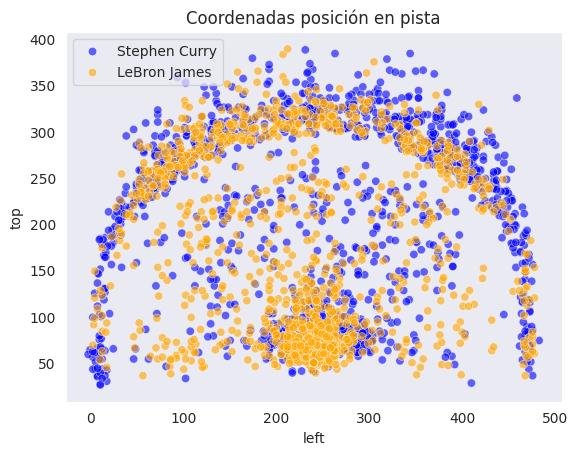

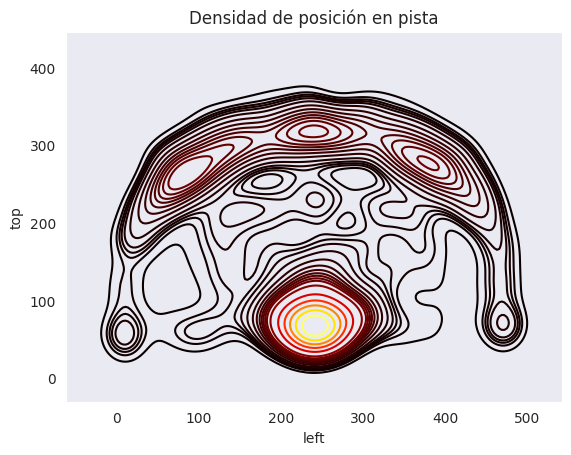

In [ ]:
import seaborn as sns

x = df['left']
y = df['top']

### Gráfico de dispersión
fig, ax = plt.subplots()
sns.scatterplot(
   x=x,
   y=y,
   data=df,
   hue='Player_Name',
  palette={'LeBron James':"orange", 'Stephen Curry':"blue"},
   alpha = 0.6)

plt.xlabel('left')
plt.ylabel('top')
plt.title('Coordenadas posición en pista')
plt.legend()
plt.show()

### Gráfico de densidad

sns.set_style("dark")
sns.kdeplot(x=x, y=y, cmap="hot", fill=False, bw_adjust=0.7, levels=20)

plt.xlabel('left')
plt.ylabel('top')
plt.title('Densidad de posición en pista')
plt.show()

## Tiros según jugador

In [ ]:
df.groupby(['result','Player_Name'])['count'].count().unstack()

Player_Name  LeBron James  Stephen Curry
result                                  
False                 765            731
True                  768            703

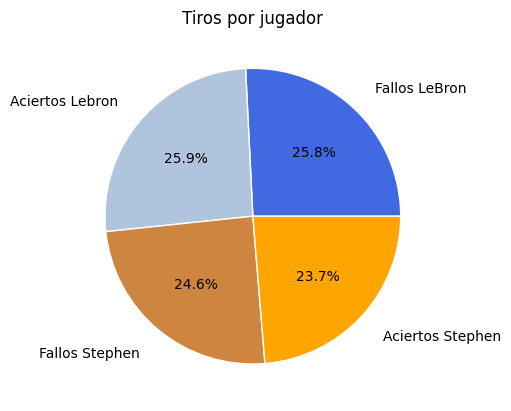

In [ ]:
names='Fallos LeBron', 'Aciertos Lebron', 'Fallos Stephen', 'Aciertos Stephen',
values=[765,768,731,703]
colors = ['royalblue', 'lightsteelblue', 'peru', 'orange']

ax = plt.pie(values, labels=names, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
        colors = colors,
        autopct='%.1f%%')
plt.title('Tiros por jugador')
plt.show()

In [ ]:
### Realizamos la prubea Chi Cuadrado para comprobar si hay diferencias significativas
observed = np.array([[765,731], [768,703]])
chi(observed)
# No hay diferencia de aciertos y fallos entre los jugadores

Chi cuadrado = 0.30034829908102534 
 p-valor = 0.5836641509032295


## Tiros según cuarto

In [ ]:
df['count'] = 0
df.groupby(['qtr','Player_Name'])['count'].count().unstack()

Player_Name  LeBron James  Stephen Curry
qtr                                     
0                      32             10
1                     321            330
2                     406            329
3                     374            385
4                     400            380

Text(0.5, 0, 'Cuarto')

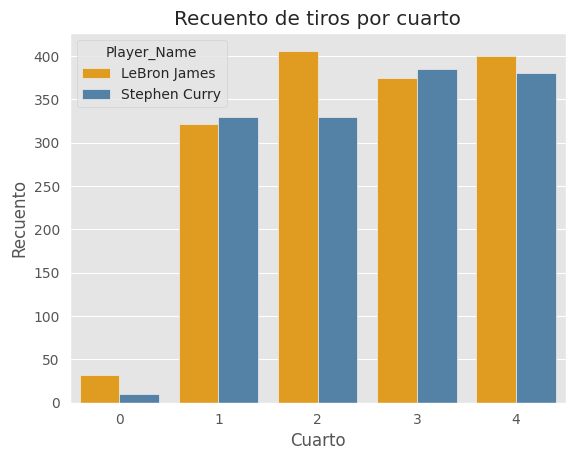

In [ ]:
grouped_data = df.groupby(['qtr','Player_Name'])['count'].count()
grouped_data = grouped_data.reset_index()

ax = sns.barplot(
    x="qtr",
    y="count",
    hue="Player_Name",
    data=grouped_data,
    palette={'LeBron James':"orange", 'Stephen Curry':"steelblue"}
    )

ax.set_title("Recuento de tiros por cuarto")
ax.set_ylabel("Recuento")
ax.set_xlabel("Cuarto")


In [ ]:
### Porcentaje de tiros acertados por cada jugador en cada cuarto

df.groupby(['qtr','Player_Name'])['result'].mean().unstack() * 100

Player_Name  LeBron James  Stephen Curry
qtr                                     
0               37.500000      40.000000
1               48.598131      52.727273
2               53.201970      48.936170
3               52.941176      46.493506
4               46.500000      48.684211

## Recuento de tiros dobles y triples acertados y fallados por jugador

In [ ]:
df.groupby(['result','shot_type','Player_Name'])['count'].count().unstack()

Player_Name       LeBron James  Stephen Curry
result shot_type                             
False  2                   428            274
       3                   337            457
True   2                   616            374
       3                   152            329

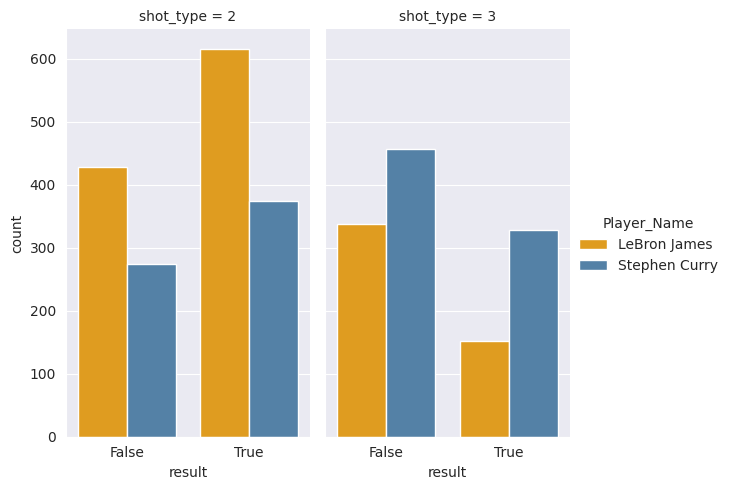

In [ ]:
import seaborn as sns
grouped_data = df.groupby(['result','shot_type','Player_Name'])['count'].count()
grouped_data = grouped_data.reset_index()

sns.set_style("darkgrid")
ax = sns.catplot(x="result", y="count",
                 hue="Player_Name", col="shot_type",
                 data=grouped_data, kind="bar",
                 height=5, aspect=.6, palette={'LeBron James':"orange", 'Stephen Curry':"steelblue"})


In [ ]:
### Test Chi Cuadrado para comprobar si hay diferencias significativas
observed = np.array([[428,274], [337,457],[616,374], [152,329]])
chi(observed)

Chi cuadrado = 173.09749060064823 
 p-valor = 2.728541217507334e-37

 V Cramer = 0.24153863786765462


LeBron James acierta más tiros dobles a canasta que triples, y más que Stephen Curry, quien, por el contrario, falla más tiros dobles y triples.

Comparando a Stephen Curry con LeBron James, este hace menos fallos al tirar dobles.

## Diferencia de puntos con respecto al equipo contrario

In [ ]:
### Media de puntos de los jugadores y del quipo contrario

df.groupby(['Player_Name'])[['lebron_team_score', 'opponent_team_score']].mean()

lebron_team_score  opponent_team_score
Player_Name                                          
LeBron James           59.813438            59.098500
Stephen Curry          63.510460            62.246165

In [ ]:
### Media de diferencia de puntos con respecto al equipo contrario

df.groupby(['Player_Name'])[['dif_points']].agg(['mean', 'std'])

dif_points          
                    mean       std
Player_Name                       
LeBron James    0.714938  9.153764
Stephen Curry   1.264296  9.545309

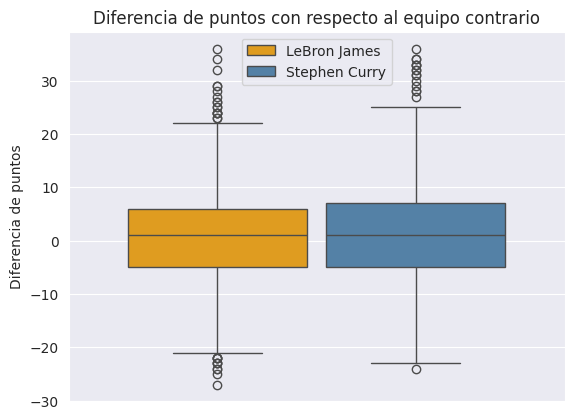

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(hue=df['Player_Name'], y=df['dif_points'],
                 hue_order=['LeBron James', 'Stephen Curry'],
                 palette={'LeBron James':"orange", 'Stephen Curry':"steelblue"}, gap=.1)
plt.legend()
plt.title('Diferencia de puntos con respecto al equipo contrario')
ax.set_ylabel("Diferencia de puntos")
plt.show()

## Influencia del liderato en la precisión de los tiros

In [ ]:
### Porcentaje de tiros acertados por jugador según liderato de partido

df.groupby(['lead','Player_Name'])['result'].mean().unstack() * 100

Player_Name  LeBron James  Stephen Curry
lead                                    
False           45.430464      43.258427
True            54.627249      54.709141

Aparentemente no hay una diferencia elevada en la precisión del tiro en base a si el equipo del jugador en cuestión lleva el liderato del partido

## Influencia de la diferencia puntos en elección del tipo de tiro

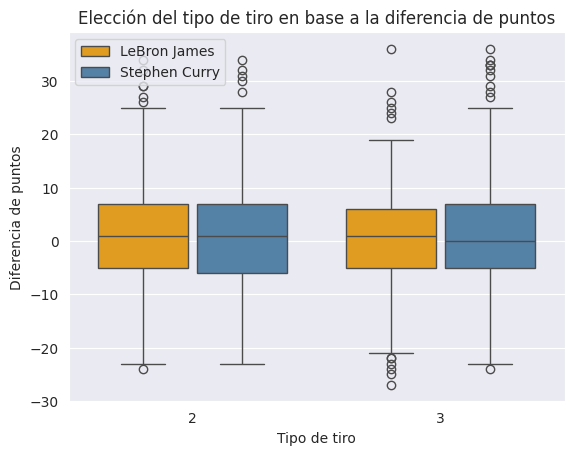

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=df['shot_type'], y=df['dif_points'],
                 hue=df['Player_Name'], hue_order=['LeBron James', 'Stephen Curry'],
                 palette={'LeBron James':"orange", 'Stephen Curry':"steelblue"}, gap=.1)

plt.title('Elección del tipo de tiro en base a la diferencia de puntos')
ax.set_ylabel("Diferencia de puntos")
ax.set_xlabel("Tipo de tiro")
plt.legend()
plt.show()

## Influencia de la distancia en la precisión del tiro

In [ ]:
### Distancia media a la que se realizan los tiros acertados y fallados

df.groupby(['result','Player_Name'])['distance_ft'].mean().unstack()

Player_Name  LeBron James  Stephen Curry
result                                  
False           16.745098      20.484268
True             9.191406      16.256046

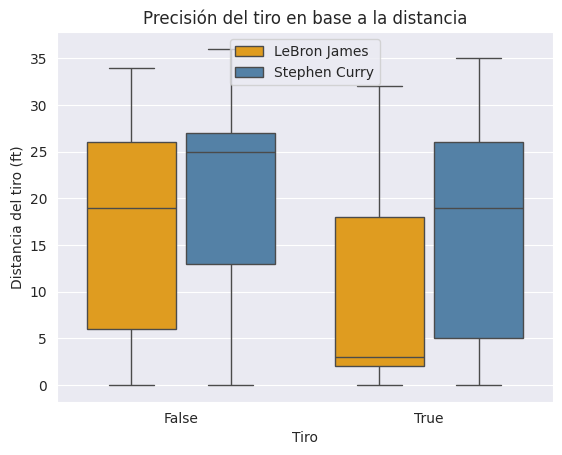

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=df['result'], y=df['distance_ft'],
                 hue=df['Player_Name'], hue_order=['LeBron James', 'Stephen Curry'],
                 palette={'LeBron James':"orange", 'Stephen Curry':"steelblue"}, gap=.1)

plt.title('Precisión del tiro en base a la distancia')
ax.set_ylabel("Distancia del tiro (ft)")
ax.set_xlabel("Tiro")
plt.legend()
plt.show()

Stephen Curry parece tener una mayor precisión de tiro a mayor distancia, en comparación con LeBron James, quién parece fallar tiros a la misma distancia que Stephen Curry acierta.

## Precisión del tiro al aumentar la distancia

In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Crear una nueva columna 'rango_distancia'
df['rango_distancia'] = pd.cut(df['distance_ft'], bins=bins, labels=labels, right=False)

# Calcular la precisión por rango de distancia
precision = df.groupby(['rango_distancia','Player_Name'], observed=True)['result'].agg(['count', 'sum'])
precision['precision'] = (precision['sum'] / precision['count']) * 100
precision = precision.reset_index()
print(precision)

# Filtrar los datos para LeBron James y Stephen Curry
lj = precision[precision['Player_Name'] == 'LeBron James']
sc = precision[precision['Player_Name'] == 'Stephen Curry']

   rango_distancia    Player_Name  count  sum  precision
0              0-5   LeBron James    605  441  72.892562
1              0-5  Stephen Curry    248  175  70.564516
2             5-10   LeBron James    153   68  44.444444
3             5-10  Stephen Curry    184   94  51.086957
4            10-15   LeBron James    101   33  32.673267
5            10-15  Stephen Curry     72   42  58.333333
6            15-20   LeBron James    127   53  41.732283
7            15-20  Stephen Curry     98   43  43.877551
8            20-25   LeBron James    105   43  40.952381
9            20-25  Stephen Curry    132   67  50.757576
10           25-30   LeBron James    415  123  29.638554
11           25-30  Stephen Curry    610  250  40.983607
12           30-35   LeBron James     27    7  25.925926
13           30-35  Stephen Curry     88   31  35.227273
14           35-40  Stephen Curry      2    1  50.000000


<ipython-input-59-664f6dbb9b54>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


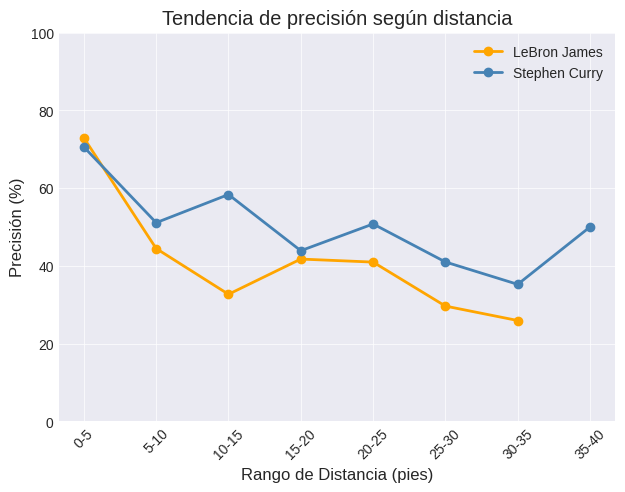

In [ ]:
fig, ax = plt.subplots()

ax.plot(lj.rango_distancia, lj['precision'], marker='o', label='LeBron James', color='orange')
ax.plot(sc.rango_distancia, sc['precision'], marker='o', label='Stephen Curry', color='steelblue')

plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=45)
plt.style.use('seaborn-darkgrid')

plt.title('Tendencia de precisión según distancia')
plt.xlabel('Rango de Distancia (pies)')
plt.ylabel('Precisión (%)')
plt.show()

#Modelo Predictivo - Árbol Decisión

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/player_shots_final.csv', index_col=0)
df = df.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## Primer modelo
Elegimos las variables independientes bajo nuestro propio cirterio, pero no obtenemos una precisión muy elevada

In [ ]:
X = df[['qtr', 'time_remaining', 'shot_type', 'distance_ft', 'lead']]
y = df['result']

### Separamos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
### Creamos el modelo
modelo = DecisionTreeClassifier(random_state=0, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1 )

### Entrenamos el modelo y hacemos predicción
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

### Calculamos la precisión
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

F1-score: 0.61


### Visualización AD


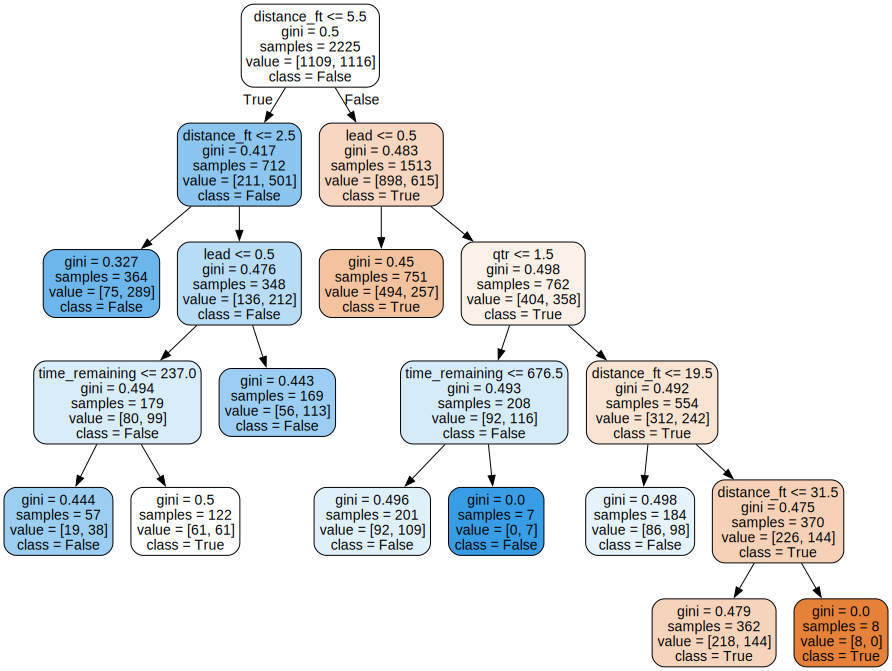

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

feature_names = ['qtr', 'time_remaining', 'shot_type', 'distance_ft', 'lead']

export_graphviz(
        modelo,
        out_file="player_shots_final.csv",
        feature_names=feature_names,
        class_names=["True", "False"],
        rounded=True,
        filled=True
    )

Source.from_file("player_shots_final.csv")

## Segundo modelo usando PCA
Al reducir la dimensionaidad del datset, la precisión del modelo mejora

In [ ]:
df = pd.read_csv('player_shots_final.csv', index_col=0)

In [ ]:
### Ajustamos el dataset
df = df.drop(['date'], axis=1, )

df[['result','lead','color','Player_Name']] = df[['result','lead','color','Player_Name']].astype('category')

df = df[[col for col in df.columns if col != 'color'] + ['color']]
df = df[[col for col in df.columns if col != 'result'] + ['result']]

In [ ]:
### Separamos las variables independientes (X) de las etiquetas (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Codificamos las variables categoricas
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
X[:, 9] = labelencoder_X.fit_transform(X[:, 9])
X[:, 12] = labelencoder_X.fit_transform(X[:, 12])

In [ ]:
### Separamos el conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, random_state=0, shuffle=False)


X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,
                                                    test_size=0.5, random_state=0, shuffle=False)

In [ ]:
### Escalamos las variables para hacer un PCA
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

### Principal Component Analysis (PCA)

In [ ]:
### PCA: Reducimos la dimensionalidad y elegimos aquellas variables con mayor aportación al modelo
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.29309798 0.17701009 0.14217011 0.08563215]


In [ ]:
### Ajustamos el modelo
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0,
                                    max_depth=5, max_leaf_nodes=10, min_samples_leaf=1)
## Entrenamos el modelo
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       random_state=0)

In [ ]:
### Predecimos con train set para comprobar overfitting
y_train_pred = classifier.predict(X_train)

from sklearn.metrics import f1_score
f1_train = f1_score(y_train_pred, y_train, average='weighted')
print(f'F1-score: {f1_train:.2f}')

F1-score: 0.74


In [ ]:
### Predecimos validation set
y_val_pred = classifier.predict(X_val)
f1_val = f1_score(y_val_pred, y_val, average='weighted')
print(f'F1-score: {f1_val:.2f}')

# La precisión no varia con respecto al train set, por lo que no parece haber overfitting

F1-score: 0.76


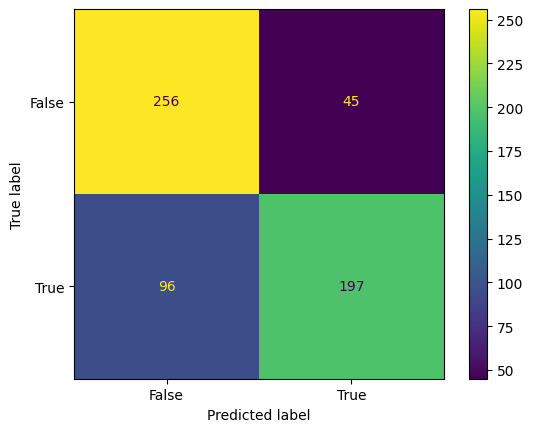

In [ ]:
### Matriz de confusión del set de validación
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    classifier, X_val, y_val)

In [ ]:
### Predecimos con test set

y_test_pred = classifier.predict(X_test)
f1_test = f1_score(y_test_pred, y_test)
print(f'F1-score: {f1_test:.2f}')

F1-score: 0.74


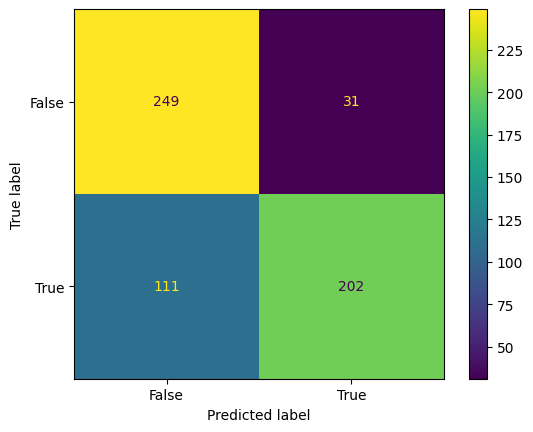

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    classifier, X_test, y_test)

### Visualización AD

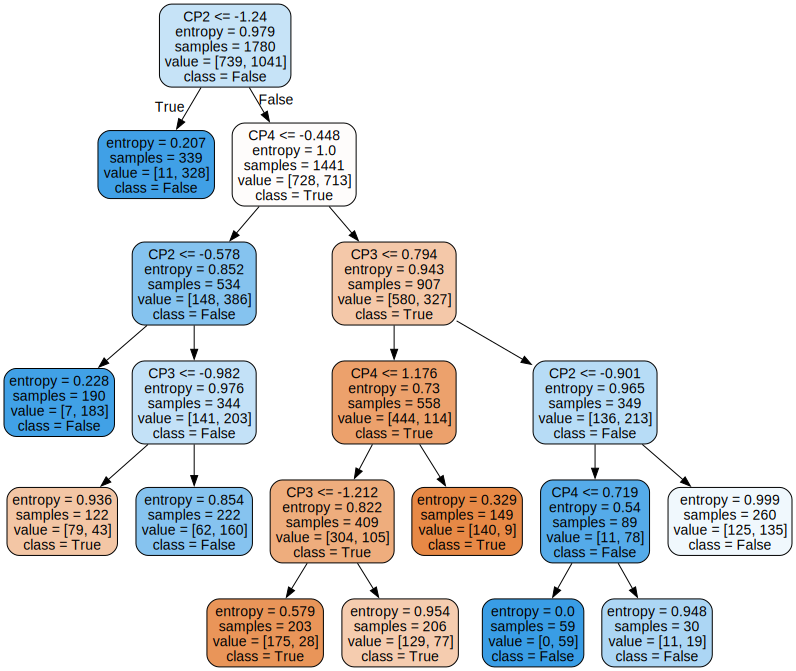

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

feature_names = ['CP1','CP2','CP3','CP4']

export_graphviz(
        classifier,
        out_file="player_shots_final.csv",
        feature_names=feature_names,
        class_names=["True", "False"],
        rounded=True,
        filled=True
    )

Source.from_file("player_shots_final.csv")